In [1]:
# importing dependencies 
import numpy as np
import pandas as pd
from lucrum.algo import pyta
import matplotlib.pyplot as plt

In [2]:
# load dataset
load_data = pd.read_csv('dataxrp.csv', sep='\t', dtype={"open": float})
load_data.drop("Unnamed: 0", axis=1, inplace=True)
display(load_data.head())

,open_time,open,high,low,close,close_time,trades,volume
0,2018-05-05 02:00:00+02:00,0.88980,0.90000,0.88800,0.89766,2018-05-05 02:14:59.999000+02:00,274,159373.17
1,2018-05-05 02:15:00+02:00,0.89766,0.90460,0.89601,0.90388,2018-05-05 02:29:59.999000+02:00,290,243422.10
2,2018-05-05 02:30:00+02:00,0.90388,0.90460,0.89540,0.90391,2018-05-05 02:44:59.999000+02:00,206,126523.80
3,2018-05-05 02:45:00+02:00,0.90390,0.90500,0.89520,0.89644,2018-05-05 02:59:59.999000+02:00,295,121757.09
4,2018-05-05 03:00:00+02:00,0.89643,0.89922,0.89218,0.89470,2018-05-05 03:14:59.999000+02:00,251,146653.00


In [3]:
df = load_data.copy()

In [4]:
def gen_features(data, short, long):
    data["MAshort"] = data["close"].rolling(window=short).mean()
    data["MAlong"] = data["close"].rolling(window=long).mean()
    
def gen_positions(data):
    data["MAlongPos"] = data.MAshort > data.MAlong
    data["MAshortPos"] = data.MAshort <= data.MAlong

    data["positions_long"] = 0
    data["positions_short"] = 0
    data.loc[data.MAlongPos, "positions_long"] = 1
    data.loc[data.MAshortPos, "positions_short"] = -1
    
    data["positions"] = data.positions_long + data.positions_short
    
def calc_performance(data):
    data["logprice"] = np.log(data.close)
    data["daily_returns"] = data.logprice - data.logprice.shift(1)
    data["pnl"] = data.positions.shift(1) * data.daily_returns
    data["cumpnl"] = data.pnl.cumsum()
    
def plot_performance(data):
    data.cumpnl.plot(label="Equity Curve", figsize=(10,5))
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.show()

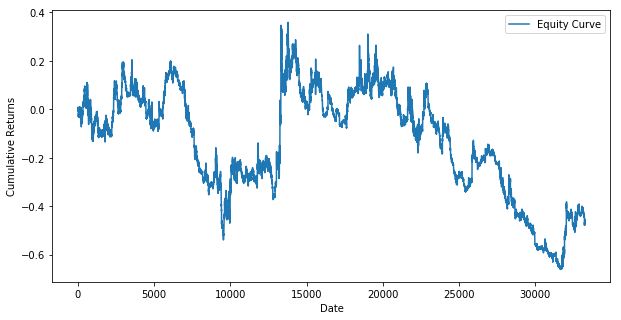

,open_time,open,high,low,close,close_time,trades,volume,MAshort,MAlong,MAlongPos,MAshortPos,positions_long,positions_short,positions,logprice,daily_returns,pnl,cumpnl
0,2018-05-05 02:00:00+02:00,0.88980,0.90000,0.88800,0.89766,2018-05-05 02:14:59.999000+02:00,274,159373.17,NaN,NaN,False,False,0,0,0,-0.107964,NaN,NaN,NaN
1,2018-05-05 02:15:00+02:00,0.89766,0.90460,0.89601,0.90388,2018-05-05 02:29:59.999000+02:00,290,243422.10,NaN,NaN,False,False,0,0,0,-0.101059,0.006905,0.000000,0.000000
2,2018-05-05 02:30:00+02:00,0.90388,0.90460,0.89540,0.90391,2018-05-05 02:44:59.999000+02:00,206,126523.80,NaN,NaN,False,False,0,0,0,-0.101025,0.000033,0.000000,0.000000
3,2018-05-05 02:45:00+02:00,0.90390,0.90500,0.89520,0.89644,2018-05-05 02:59:59.999000+02:00,295,121757.09,NaN,NaN,False,False,0,0,0,-0.109324,-0.008298,-0.000000,0.000000
4,2018-05-05 03:00:00+02:00,0.89643,0.89922,0.89218,0.89470,2018-05-05 03:14:59.999000+02:00,251,146653.00,0.899318,NaN,False,False,0,0,0,-0.111267,-0.001943,-0.000000,0.000000
5,2018-05-05 03:15:00+02:00,0.89486,0.89999,0.89257,0.89260,2018-05-05 03:29:59.999000+02:00,247,324400.89,0.898306,NaN,False,False,0,0,0,-0.113617,-0.002350,-0.000000,0.000000
6,2018-05-05 03:30:00+02:00,0.89462,0.89999,0.89261,0.89998,2018-05-05 03:44:59.999000+02:00,99,27190.02,0.897526,NaN,False,False,0,0,0,-0.105383,0.008234,0.000000,0.000000
7,2018-05-05 03:45:00+02:00,0.89978,0.90545,0.89525,0.90545,2018-05-05 03:59:59.999000+02:00,168,83059.49,0.897834,0.899328,False,True,0,-1,-1,-0.099323,0.006060,0.000000,0.000000
8,2018-05-05 04:00:00+02:00,0.90545,0.90700,0.90069,0.90132,2018-05-05 04:14:59.999000+02:00,376,204849.45,0.898810,0.899785,False,True,0,-1,-1,-0.103895,-0.004572,0.004572,0.004572
9,2018-05-05 04:15:00+02:00,0.90133,0.90334,0.89769,0.90300,2018-05-05 04:29:59.999000+02:00,285,201916.20,0.900470,0.899675,True,False,1,0,1,-0.102033,0.001862,-0.001862,0.002710


In [5]:
gen_features(df, 5, 8)
gen_positions(df)
calc_performance(df)
plot_performance(df)
display(df.head(50))